<a href="https://colab.research.google.com/github/skyshine460/Datascience_notebook/blob/main/submit_moving60.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
# 初期設定
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
df_prophet21 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving21.csv", header=None)
df_lstm30_s42 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30.csv", header=None)
df_lstm30_s100 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s100.csv", header=None)
df_lstm30_s224 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s224.csv", header=None)
# df_lstm30_s2024 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving30_s2024.csv", header=None)

df_lstm30_s77 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving50.csv", header=None)
df_lstm30_s2024 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/submit_moving49.csv", header=None)

val_lstm_2015_2016_s42 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/val_lstm_2015_2016_s42.csv", header=None)
val_lstm_2015_2016_s77 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/val_lstm_2015_2016_s77.csv", header=None)
val_lstm_2015_2016_s224 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/val_lstm_2015_2016_s224.csv", header=None)

val_prophet_2015_2016 = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/val_prophet_2015_2016.csv", header=None)

sample_submit = pd.read_csv("/content/drive/MyDrive/SOTA Challenge(アップル 引越し需要予測)/sample_submit.csv", header=None)

In [199]:
df_prophet21.columns = ['datetime', 'y']

df_lstm30_s100.columns = ['datetime', 'y']
df_lstm30_s224.columns = ['datetime', 'y']
df_lstm30_s42.columns = ['datetime', 'y']
df_lstm30_s77.columns = ['datetime', 'y']
df_lstm30_s2024.columns = ['datetime', 'y']

val_lstm_2015_2016_s42.columns = ['actual', 'yhat']
val_lstm_2015_2016_s77.columns = ['actual', 'yhat']
val_lstm_2015_2016_s224.columns = ['actual', 'yhat']

val_prophet_2015_2016.columns = ['actual', 'yhat']

In [200]:
print(val_lstm_2015_2016_s42.shape)
print(val_lstm_2015_2016_s77.shape)
print(val_lstm_2015_2016_s77.shape)
print(val_prophet_2015_2016.shape)

(731, 2)
(731, 2)
(731, 2)
(731, 2)


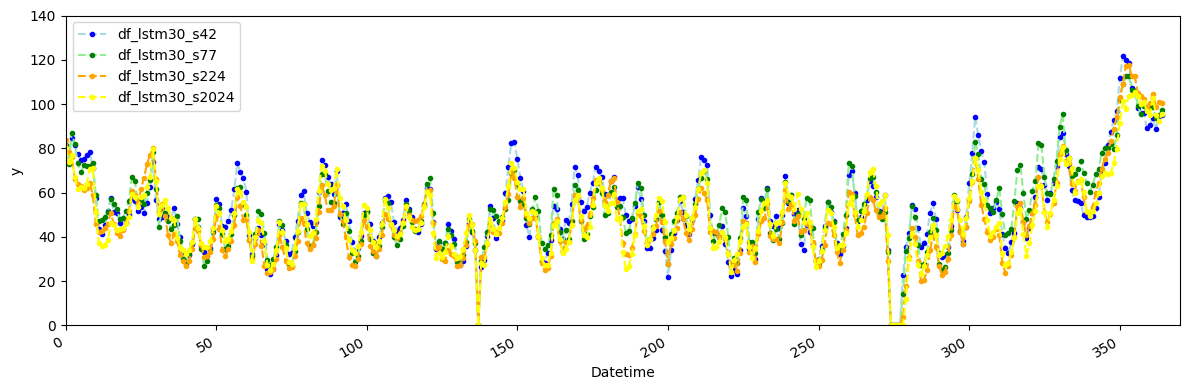

In [201]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_lstm30_s42['y'], ls='--', color='lightblue', label='df_lstm30_s42', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30_s77['y'], ls='--', color='lightgreen', label='df_lstm30_s77', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_lstm30_s224['y'], ls='--', color='orange', label='df_lstm30_s224', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')
ax.plot(df_lstm30_s2024['y'], ls='--', color='yellow', label='df_lstm30_s2024', marker='o', markersize=3, markerfacecolor='yellow', markeredgecolor='yellow')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [202]:
# ★
df_submit_0 = df_lstm30_s42.copy()
df_submit_0["ense_lstm_rand"] = np.nan
df_submit_0["ense_lstm_rand"] = df_lstm30_s77["y"]*0.45 + df_lstm30_s42["y"]*0.5 + df_lstm30_s224["y"]*0.05
df_submit_0["ense_lstm_rand"].head()

,ense_lstm_rand
0,78.040629
1,73.709852
2,85.256002
3,81.085390
4,74.907816


In [203]:
df_submit_1 = val_lstm_2015_2016_s77.copy()
df_submit_1["ense_lstm_rand_val"] = np.nan
df_submit_1["ense_lstm_rand_val"] = val_lstm_2015_2016_s77["yhat"]*0.45 + val_lstm_2015_2016_s42["yhat"]*0.5 + val_lstm_2015_2016_s224["yhat"]*0.05
df_submit_1["ense_lstm_rand_val"].head()

,ense_lstm_rand_val
0,50.501885
1,41.765898
2,54.217117
3,54.834695
4,55.766677


In [204]:
df_submit_1.tail()

,actual,yhat,ense_lstm_rand_val
726,94.0,95.348679,91.770410
727,86.0,95.321495,94.230984
728,98.0,94.768440,95.502084
729,99.0,100.794502,98.562159
730,105.0,107.172112,103.879234


In [205]:
val_prophet_2015_2016.tail()

,actual,yhat
726,94.0,105.425759
727,86.0,95.871767
728,98.0,89.142615
729,99.0,94.755086
730,105.0,94.388926


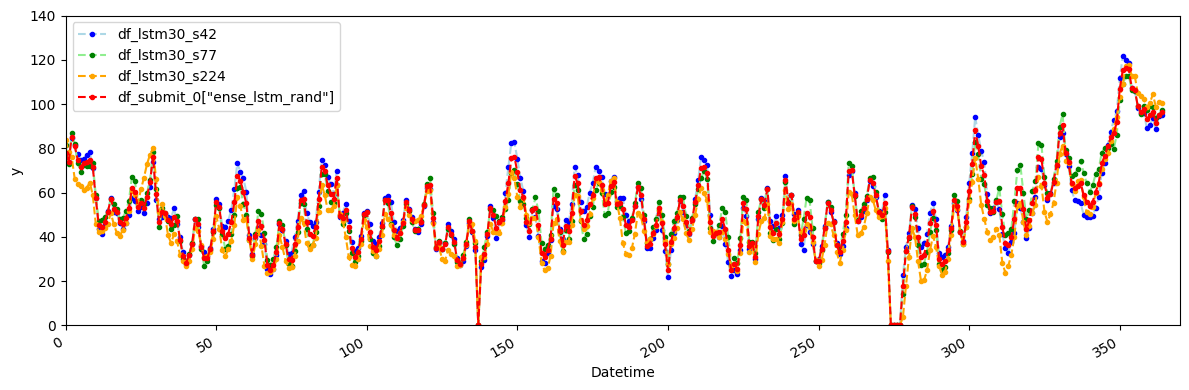

In [206]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_lstm30_s42['y'], ls='--', color='lightblue', label='df_lstm30_s42', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_lstm30_s77['y'], ls='--', color='lightgreen', label='df_lstm30_s77', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_lstm30_s224['y'], ls='--', color='orange', label='df_lstm30_s224', marker='o', markersize=3, markerfacecolor='orange', markeredgecolor='orange')
ax.plot(df_submit_0["ense_lstm_rand"], ls='--', color='red', label='df_submit_0["ense_lstm_rand"]', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [207]:

df_submit_0["ense_21_lstm"] = np.nan
df_submit_0["ense_21_lstm"][:-31] = df_prophet21["y"][:-31]*0.7 + df_submit_0["ense_lstm_rand"][:-31]*0.33
df_submit_0["ense_21_lstm"][-31:] = df_prophet21["y"][-31:]*0.9 + df_submit_0["ense_lstm_rand"][-31:]*0.14
df_submit_0["ense_21_lstm"].head()

<ipython-input-207-4f3e93c347a4>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_submit_0["ense_21_lstm"][:-31] = df_prophet21["y"][:-31]*0.7 + df_submit_0["ense_lstm_rand"][:-31]*0.33
<ipython-input-207-4f3e93c347a4>:2: SettingWithCopyW

,ense_21_lstm
0,77.847202
1,76.637899
2,77.472521
3,76.264773
4,67.391514


In [208]:
df_submit_1["ense_2015_2016"] = np.nan
#2015
df_submit_1["ense_2015_2016"][:333] = val_prophet_2015_2016["yhat"][:333]*0.7 + df_submit_1["ense_lstm_rand_val"][:333]*0.33
df_submit_1["ense_2015_2016"][333:364] = val_prophet_2015_2016["yhat"][333:364]*0.9 + df_submit_1["ense_lstm_rand_val"][333:364]*0.14

#2016
df_submit_1["ense_2015_2016"][364:-31] = val_prophet_2015_2016["yhat"][364:-31]*0.7 + df_submit_1["ense_lstm_rand_val"][364:-31]*0.33
df_submit_1["ense_2015_2016"][-31:] = val_prophet_2015_2016["yhat"][-31:]*0.9 + df_submit_1["ense_lstm_rand_val"][-31:]*0.14


# MAEの計算
import tensorflow as tf
mae = tf.keras.metrics.MeanAbsoluteError()
val_performance1 = mae(df_submit_1["actual"][:365], df_submit_1["ense_2015_2016"][:365]).numpy()
val_performance2 = mae(df_submit_1["actual"][365:], df_submit_1["ense_2015_2016"][365:]).numpy()

print(f"Validation MAE 2015: {val_performance1}")
print(f"Validation MAE 2016: {val_performance2}")

Validation MAE 2015: 4.34049129486084
Validation MAE 2016: 4.573623180389404


<ipython-input-208-c3b35b693877>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_submit_1["ense_2015_2016"][:333] = val_prophet_2015_2016["yhat"][:333]*0.7 + df_submit_1["ense_lstm_rand_val"][:333]*0.33


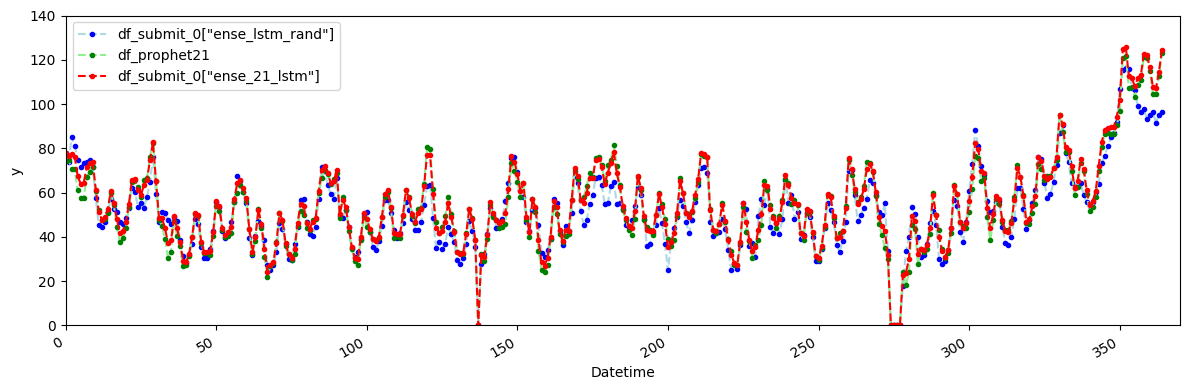

In [209]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(df_submit_0["ense_lstm_rand"], ls='--', color='lightblue', label='df_submit_0["ense_lstm_rand"]', marker='o', markersize=3, markerfacecolor='blue', markeredgecolor='blue')
ax.plot(df_prophet21['y'], ls='--', color='lightgreen', label='df_prophet21', marker='o', markersize=3, markerfacecolor='green', markeredgecolor='green')
ax.plot(df_submit_0["ense_21_lstm"], ls='--', color='red', label='df_submit_0["ense_21_lstm"]', marker='o', markersize=3, markerfacecolor='red', markeredgecolor='red')

ax.set_xlabel('Datetime')
ax.set_ylabel('y')

ax.legend(loc='best')
plt.ylim(0, 140)
plt.xlim(0, 370)

fig.autofmt_xdate()
plt.tight_layout()

In [210]:
df_submit = pd.DataFrame({
    'datetime': sample_submit.iloc[:, 0].reset_index(drop=True),
    'y': df_submit_0["ense_21_lstm"].reset_index(drop=True)
})

display(df_submit.head(), df_submit.tail())

,datetime,y
0,2016-04-01,77.847202
1,2016-04-02,76.637899
2,2016-04-03,77.472521
3,2016-04-04,76.264773
4,2016-04-05,67.391514


,datetime,y
360,2017-03-27,116.620697
361,2017-03-28,107.722760
362,2017-03-29,107.041289
363,2017-03-30,114.564501
364,2017-03-31,124.256052


In [211]:
df_submit.to_csv("submit_moving60.csv", index=False, header=False)